In [1]:
import numpy as np
import pandas as pd
import h5py
from data_helpers import timeseries_shuffler, split_data
%matplotlib inline

In [2]:
all_head_data_h5 = h5py.File('datasets/all_head_data.hdf5', 'r')
idx_start, idx_stop = [6,9]
y = np.asarray([np.asarray(all_head_data_h5[key]) for key in all_head_data_h5.keys()][0:9]).T[:,idx_start:idx_stop]
print('y shape: ', y.shape)

head_data_keys = list(all_head_data_h5.keys())[0:9][idx_start:idx_stop]
head_data_keys_int = ['yaw_abs', 'roll_abs', 'pitch_abs']
print('head_data_keys intuitive: ', head_data_keys_int)

y shape:  (80223, 3)
head_data_keys intuitive:  ['yaw_abs', 'roll_abs', 'pitch_abs']


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2ac7bb67c860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x2ac7befc4be0>], dtype=object)

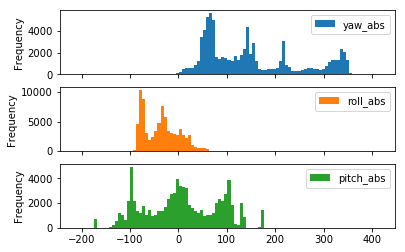

In [3]:
y_frame = pd.DataFrame(y)
y_frame.columns = head_data_keys_int
y_frame.plot.hist(subplots=True, bins=100)

In [4]:
def frame(them):
    return list(map(pd.DataFrame, them))

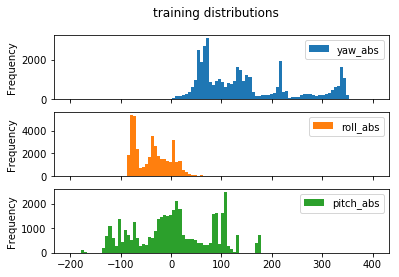

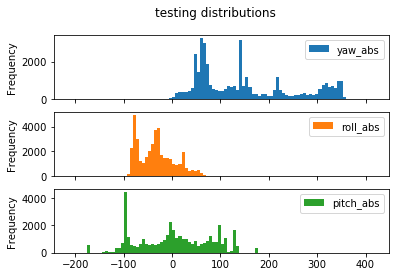

In [10]:
x1, y1 = timeseries_shuffler(y,y,3000,25)
x1, x2, y1, y2 = frame(split_data(x1, y1, 0.5))
y1.columns = head_data_keys_int
y2.columns = head_data_keys_int
y1_plot = y1.plot.hist(subplots=True, bins=100, title="training distributions")
y2_plot = y2.plot.hist(subplots=True, bins=100, title="testing distributions")

In [6]:
y2.describe()

,yaw_abs,roll_abs,pitch_abs
count,39786.000000,39786.000000,39786.000000
mean,151.141775,-33.951003,3.428746
std,103.169896,37.137140,77.423194
min,-92.820576,-88.479298,-213.201206
25%,63.521142,-70.449715,-62.602609
50%,128.746832,-35.527470,1.730165
75%,221.724426,-10.465673,71.741362
max,415.911391,80.568162,193.950906
